# SENTIMENT ANALYSIS

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("amazon_unlocked_mobile.csv")

In [3]:
data.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0


In [4]:
data.shape

(413840, 6)

In [5]:
data.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [8]:
data.shape

(334335, 6)

In [9]:
df=data.iloc[:10000]

In [10]:
df['Reviews']=df['Reviews'].str.lower()

In [11]:
df['Reviews']

0        i feel so lucky to have found this used (phone...
1        nice phone, nice up grade from my pantach revu...
2                                             very pleased
3        it works good but it goes slow sometimes but i...
4        great phone to replace my lost phone. the only...
                               ...                        
13315    my auxiliary cord and headphones will not plug...
13316    nicely packaged and professionally refurbished...
13317    im very happy with the phone works perfect bat...
13318                                       100% satisfied
13319    the phone didn't have any scratches and looked...
Name: Reviews, Length: 10000, dtype: object

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lm=WordNetLemmatizer()

In [13]:
df['Reviews']=df['Reviews'].apply(lambda x:re.sub('[^a-zA-Z]',' ',x))

In [14]:
df['Reviews']=df['Reviews'].apply(word_tokenize)
df['Reviews']=df['Reviews'].apply(lambda x:[lm.lemmatize(word) for word in x
                                            if word not in set(stopwords.words('english'))])
df['Reviews']=df['Reviews'].apply(lambda x:' '.join(x))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=4000,ngram_range=(1,3))

In [16]:
x=tfidf.fit_transform(df['Reviews']).toarray()

In [17]:
df = df.drop(['Rating','Product Name','Brand Name','Price','Review Votes'], axis = 1)

In [18]:
def find_pol(x):
    return TextBlob(x).sentiment.polarity

df['Polarity'] = df['Reviews'].apply(find_pol)

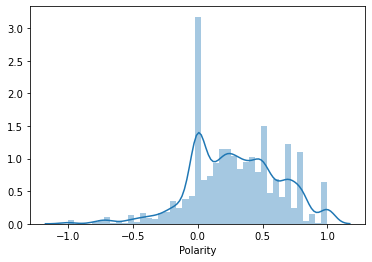

In [20]:
sns.distplot(df['Polarity'])

In [21]:
def rating(k):
    if k <= -0.6:
        return 1
    elif k <= -0.2:
        return 2
    elif k <= 0.2:
        return 3
    elif k <= 0.6:
        return 4
    else:
        return 5
    
df['Predicted Rating'] = df['Polarity'].apply(rating)

In [22]:
df

,Reviews,Polarity,Predicted Rating
0,feel lucky found used phone u used hard phone ...,0.157381,3
1,nice phone nice grade pantach revue clean set ...,0.437037,4
2,pleased,0.500000,4
3,work good go slow sometimes good phone love,0.400000,4
4,great phone replace lost phone thing volume bu...,0.800000,5
...,...,...,...
13315,auxiliary cord headphone plug phone bummed wor...,0.700000,5
13316,nicely packaged professionally refurbished tot...,0.300000,4
13317,im happy phone work perfect battery last good ...,0.625000,5
13318,satisfied,0.500000,4


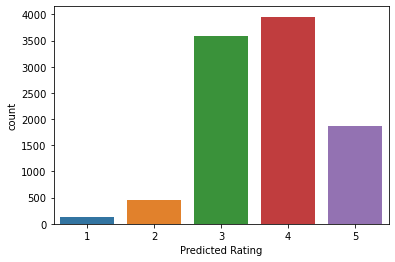

In [24]:
sns.countplot(x = 'Predicted Rating', data = df)

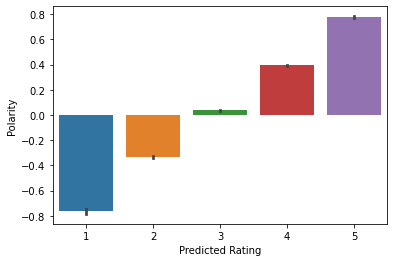

In [23]:
sns.barplot(x = 'Predicted Rating', y = 'Polarity', data = df)

In [25]:
y=df[['Predicted Rating']]

# SPLITING THE DATASET FOR TRAIN AND TEST

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#split into train(80%) and test(20%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# APPLY LOGISTIC REGRESSION 

In [28]:
#define model 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [29]:
# fit model on labeled dataset
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred_1=lr.predict(x_test)

# APPLY DECISION TREE

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf=DecisionTreeClassifier()

In [33]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred_2=clf.predict(x_test)

# APPLY NAIVE BAYES 

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
clf_2=GaussianNB()

In [37]:
clf_2.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred_3=clf_2.predict(x_test)

# APPLY RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion = 'entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
y_pred_4= classifier.predict(x_test)

# APPLY ADABOOSTCLASSIFIER

In [41]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [42]:
y_pred_5= abc.predict(x_test)

# APPLY GRADIENTBOOSTINGCLASSIFIER

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [44]:
y_pred_6= gbc.predict(x_test)

# APPLY XGBCLASSIFIER

In [45]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

[00:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred_7= xgb.predict(x_test)

# APPLY KNEIGHBORS CLASSIFIER

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred_8= knc.predict(x_test)

# ACCURACY

In [49]:

# IMPORT LIBRARIES

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score

In [50]:
L=accuracy_score(y_test,y_pred_1)
D=accuracy_score(y_test,y_pred_2)
N=accuracy_score(y_test,y_pred_3)
R=accuracy_score(y_test,y_pred_4)
A=accuracy_score(y_test,y_pred_5)
G=accuracy_score(y_test,y_pred_6)
X=accuracy_score(y_test,y_pred_7)
K=accuracy_score(y_test,y_pred_8)

In [54]:
df={'CLASSIFIER':['LOGISTIC REGRESSION','DECISION TREE','NAIVE BAYES',
                  'RANDOM FOREST','ADABOOST CLASSIFIER','GRADIENTBOOST CLASSIFIER',
                  'XGB CLASSIFIER','KNEIGHBORS CLASSIFIER'],
     'ACCURACY SCORE':[L,D,N,R,A,G,X,K]}

In [55]:
table=pd.DataFrame(df)

In [56]:
table

,CLASSIFIER,ACCURACY SCORE
0,LOGISTIC REGRESSION,0.8090
1,DECISION TREE,0.8490
2,NAIVE BAYES,0.6510
3,RANDOM FOREST,0.8450
4,ADABOOST CLASSIFIER,0.5860
5,GRADIENTBOOST CLASSIFIER,0.7885
6,XGB CLASSIFIER,0.8630
7,KNEIGHBORS CLASSIFIER,0.5060
